# ECE 143 

## Ad-Hoc Communications Network

Wilson Tran
A12127824

We can abstract the problem of planning an ad-hoc communication network by using rectangles because each individual tower can monitor a rectangular subsection of a sepcific width and height. Since communication towers are unreliable and are random and independently distributed, there is no reliable method to control where or how big a tower's footprint will be. 

Using the following parameters:
1. All rectangular sections have integer-based corners.
2. All rectangular sections must be contained in the overall rectangular footprint.
3. The height and width of each rectangular section is sampled from a uniform distribution.
4. Positions of the windows are also determined by uniform random distribution.
5. All footprints must be rectangles (not general polygons).
6. When a new tower comes online, if its coverage rectangle intersects the pre-existing composite footprint, then that new tower’s coverage is trimmed such that its maximum remaining coverage area is retained (see sequential diagram below).

we can solve this problem by abstracting the problem with randomly generated rectangles such that the user needs to only specify an overall size of desired coverage footprint. In order to start solving this problem, it is necessary to create a function that will generate rectangles.

## Generating Rectangles

In [68]:
# Import basic modules to perform calculations and visualizations
import numpy as np
import matplotlib.pyplot as plt
import random

# Allows plots to appear in the notebook. 
%matplotlib inline

In [69]:
def gen_rect(win_size):
    '''
    Generator that uses a random number integer generator to generate a
    corner, width, and height. 
    :@param win_size: int, The max amount of units of the final plot 
    in one direction. 
    :@return: tuple, Properties of a rectangle object in the following
    format (bottom_left_x, bottom_left_y, width, height)
    '''
    assert isinstance(win_size, int), "Window size must be an integer"
    assert win_size > 0, "Window size must be non-negative"
    
    while True:
        # Range of X is 0 - 9 on the final plot
        bt_x = random.randint(0, win_size)
        
        # Range of Y is 0 - 9 on the final plot
        bt_y = random.randint(0, win_size)
        
        # Rectangle width and height cannot exceed size of plot
        width = random.randint(0, win_size - bt_x + 1)
        height = random.randint(0, win_size - bt_y + 1)
        
        yield (bt_x, bt_y, width, height)

## Determining Max Area
Since the rectangles are randomly generated, it is very possible that the rectangles can overlap. However, communication towers cannot have overlapping ranges. The newly generated rectangle will therefore have to be truncated. In order to maximize efficiency, the part of the rectangle that has the greatest area and is not overlapping while still maintaining a rectangular shape will be kept. 

In [70]:
def max_area(rectArea):
    '''
    Evaluates the area of a binary rectangle matrix and determines
    max area. 
    :@param rectArea: numpy.ndarray, A rectangle area in the form of a
    binary matrix
    :@return: numpy.ndarray, Rectangle with maximum area
    '''
    
    assert isinstance(rectArea, np.ndarray), "Area must be a matrix."
    
    # Dummy val to get inside loop
    area = -10000
    
    # Survey length of rectArea, and length must not be 0
    for aRow in range(len(rectArea)):
        if aRow != 0:
            # Survey width in rectArea
            for aCol in range(len(rectArea[0])):
                # If the rectangle unit exists in the area
                if rectArea[aRow][aCol] == 1:
                    # Accumulate amount of units in the area
                    rectArea[aRow][aCol] += rectArea[aRow-1][aCol]
    
        # Calculate width of each row by counting units
        curRow = rectArea[aRow]
        for unit in range(len(curRow)):
            width = 1
            
            # Increment value if rectangle units are continuous
            for nextUnit in range(unit+1, len(curRow)):
                if curRow[nextUnit] >= curRow[unit]:
                    width += 1
                    
            # Get area by multiplying width and height
            height = curRow[unit]
            
            # Determine if height is greatest height
            if width*height > area:
                area = width*height
                
                # Update parameters to plot
                maxHeight = height
                maxWidth = width
                xPos = unit
                yPos = aRow
                
    # Graph the resulting rectangle
    maxArea = np.zeros_like(rectArea)
    maxArea[int(yPos-maxHeight+1):int(yPos+1), int(xPos):int(xPos+maxWidth)] = 1
    
    return maxArea

## Testing the System
Now the user can input a given Window Size and test to see if the system works. The expected behavior is that rectangles will be plotted and none of the rectangles should overlap. The rectangles will be "trimmed" by finding the max area in which the rectangles do not overlap. 

In [71]:
def run(win_size):
    '''
    Runs the generator until the area specified by the user is
    completely filled. 
    :@param win_size: int, The max amount of units of the final plot
    in one direction. 
    :@return: tuple, Returns the number of rectangles, the area, and the
    animated plot.
    '''
    assert isinstance(win_size, int), "Window size must be an integer"
    assert win_size > 0, "Window size must be non-negative"
    
    # Initialization of variables
    finalPlot = np.zeros((win_size, win_size))    
    animated = []
    STOP = win_size*win_size+1
    
    # Begins generating rectangles
    gen = gen_rect(win_size)
    counter = 1
    
    img = plt.imshow(finalPlot)
    animated.append([img])

    # While still able to plot new rectangles
    while not finalPlot.all() and counter < STOP:
        nextRectCoord = next(gen)
        nX, nY, nWidth, nHeight = nextRectCoord
        rectArea = np.zeros((win_size, win_size))
        
        # Populate Rectangles
        rectArea[nX:nX+nWidth, nY:nY+nHeight]=1
        
        # Trim Rectangles
        rectArea[finalPlot > 0]=0
        
        # Retrieves largest area
        maxRect = max_area(rectArea)
        
        # Increment counter of rectangles if added to final plot
        if maxRect.any():
            finalPlot[maxRect>0] = counter
            img = plt.imshow(finalPlot, cmap='tab20', animated=True, vmin=0)
            animated.append([img])
            
            counter+=1

    area_covered = 100. * np.count_nonzero(finalPlot)/(win_size*win_size)
    if counter == 2:
        print '1 tower covering {}% of the area.'.format(area_covered)
    else:
        print '{} towers covering {}% of the area.'.format(counter-1,
                                                           area_covered)

    return counter - 1, area_covered, animated

55 towers covering 100.0% of the area.


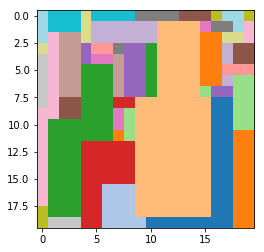

In [77]:
_,_,animated=run(20)

## Average Number of Towers
Running 50 times, I can calculate the average number of towers needed.

22 towers covering 100.0% of the area.
20 towers covering 100.0% of the area.
20 towers covering 100.0% of the area.
27 towers covering 100.0% of the area.
24 towers covering 100.0% of the area.
23 towers covering 100.0% of the area.
25 towers covering 100.0% of the area.
28 towers covering 100.0% of the area.
23 towers covering 100.0% of the area.
15 towers covering 100.0% of the area.
32 towers covering 100.0% of the area.
26 towers covering 100.0% of the area.
3 towers covering 100.0% of the area.
18 towers covering 100.0% of the area.
35 towers covering 100.0% of the area.
23 towers covering 100.0% of the area.
29 towers covering 100.0% of the area.
20 towers covering 100.0% of the area.
26 towers covering 100.0% of the area.
19 towers covering 100.0% of the area.
11 towers covering 100.0% of the area.
28 towers covering 100.0% of the area.
11 towers covering 100.0% of the area.
22 towers covering 100.0% of the area.
27 towers covering 100.0% of the area.
25 towers covering 100.0% 

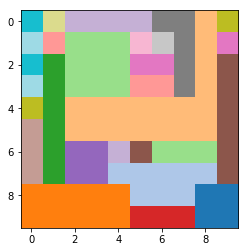

In [83]:
win_size = 10
numTowers10 = []

for i in range(50):
    numTowers10.append(run(win_size)[0])

In [85]:
avg10 = sum(numTowers10)/50.
print 'It takes an average of {} communication towers to cover the 10 x 10 area'.format(sum(numTowers10)/50.)

It takes an average of 22.84 communication towers to cover the 10 x 10 area


63 towers covering 100.0% of the area.
43 towers covering 100.0% of the area.
56 towers covering 100.0% of the area.
65 towers covering 100.0% of the area.
30 towers covering 100.0% of the area.
50 towers covering 100.0% of the area.
50 towers covering 100.0% of the area.
37 towers covering 100.0% of the area.
42 towers covering 100.0% of the area.
33 towers covering 100.0% of the area.
66 towers covering 100.0% of the area.
51 towers covering 100.0% of the area.
64 towers covering 100.0% of the area.
38 towers covering 100.0% of the area.
50 towers covering 100.0% of the area.
58 towers covering 100.0% of the area.
55 towers covering 100.0% of the area.
75 towers covering 100.0% of the area.
39 towers covering 100.0% of the area.
41 towers covering 100.0% of the area.
39 towers covering 100.0% of the area.
32 towers covering 100.0% of the area.
48 towers covering 100.0% of the area.
45 towers covering 100.0% of the area.
49 towers covering 100.0% of the area.
41 towers covering 100.0%

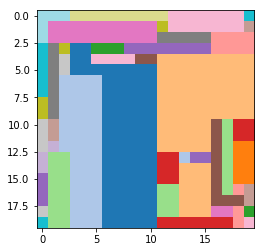

In [86]:
win_size = 20
numTowers20 = []
for i in range(50):
    numTowers20.append(run(win_size)[0])
    
avg20 = sum(numTowers20)/50.
print 'It takes an average of {} communication towers to cover the 20 x 20 area'.format(sum(numTowers20)/50.)

It takes a little more than double the amount of towers to cover the double the area. This makes sense due to the uniform distribution of towers. 

## Average Area Covered

In [87]:
print 'The average area per rectangle in the 10 x 10 window size is {}%.'.format(avg10/(10*10)) 
print 'The average area per rectangle in the 20 x 20 window size is {}%.'.format(avg20/(20*20))

The average area per rectangle in the 10 x 10 window size is 0.2284%.
The average area per rectangle in the 20 x 20 window size is 0.12295%.


The average area covered per rectangle follows the same behavior as the amount of towers necessary. On average, a rectangle consumes almost twice as much area in the 10x10 layout opposed to the 20x20 layout.  

## Conclusion

This project gives insight on how to abstract a complex problem such as Ad-Hoc networking into a much more tangible problem using rectangles. 